In [ ]:
!git clone https://github.com/Utsav2408/Heart-Disease-Using-SVM.git

!pip install geopandas



Cloning into 'Heart-Disease-Using-SVM'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 1.06 MiB | 10.13 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import pandas as pd

In [ ]:
data='/content/heart_failure_clinical_records_dataset.csv'
df=pd.read_csv(data)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

###  No Hyperparameter and No Feature Selection

In [ ]:
# Create an instance of Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Training / Fitting the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediction
predictions = rf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[55  7]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        62
           1       0.76      0.79      0.77        28

    accuracy                           0.86        90
   macro avg       0.83      0.84      0.83        90
weighted avg       0.86      0.86      0.86        90



In [ ]:
from sklearn.metrics import cohen_kappa_score

#calculate Cohen's Kappa
cohen_kappa_score(y_test, predictions)

0.6662863662293212

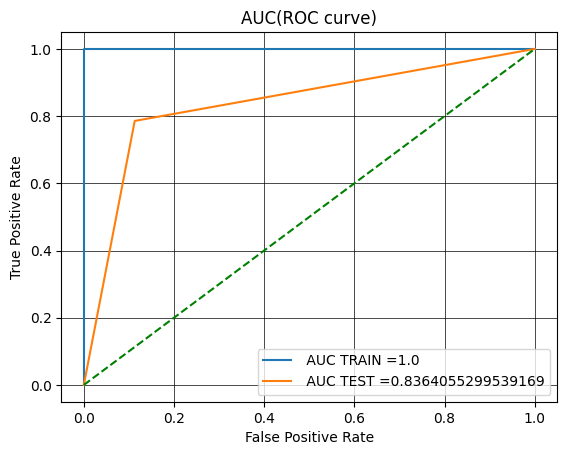

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Hyperparameter and No Feature Selection

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Importing GridSearchCV from model_selection - CV - Cross Validation
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=2)

# Fitting the data
grid.fit(X_train, y_train)

grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf

In [ ]:
from sklearn.metrics import cohen_kappa_score

#calculate Cohen's Kappa
cohen_kappa_score(y_test, grid_predictions)

0.6949152542372882

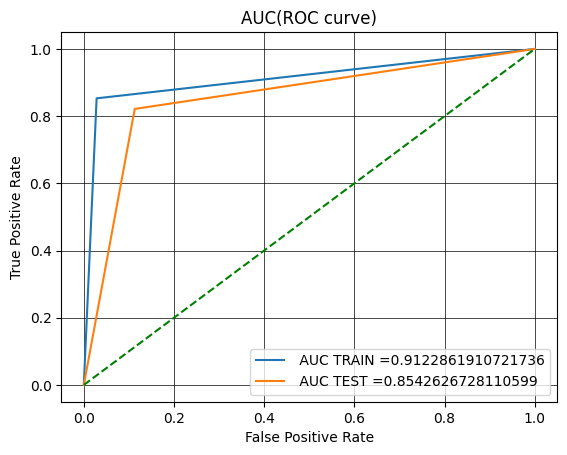

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Using Feature Selection

In [ ]:
# Create an instance of Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Training / Fitting the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.feature_selection import RFE
cols = list(X.columns)
num_features_to_select = 5
#Initializing RFE model
rfe = RFE(estimator=rf_model, n_features_to_select=num_features_to_select)
#Transforming data using RFE
X_train = rfe.fit_transform(X_train, y_train)
X_test = rfe.transform(X_test)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index


In [ ]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

age selected=True rank=1
anaemia selected=False rank=5
creatinine_phosphokinase selected=True rank=1
diabetes selected=False rank=8
ejection_fraction selected=True rank=1
high_blood_pressure selected=False rank=6
platelets selected=False rank=2
serum_creatinine selected=True rank=1
serum_sodium selected=False rank=3
sex selected=False rank=7
smoking selected=False rank=4
time selected=True rank=1


In [ ]:
# Prediction
predictions = rf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[53  9]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        62
           1       0.71      0.79      0.75        28

    accuracy                           0.83        90
   macro avg       0.80      0.82      0.81        90
weighted avg       0.84      0.83      0.84        90



In [ ]:
from sklearn.metrics import cohen_kappa_score

#calculate Cohen's Kappa
cohen_kappa_score(y_test, predictions)

0.6222719641857862

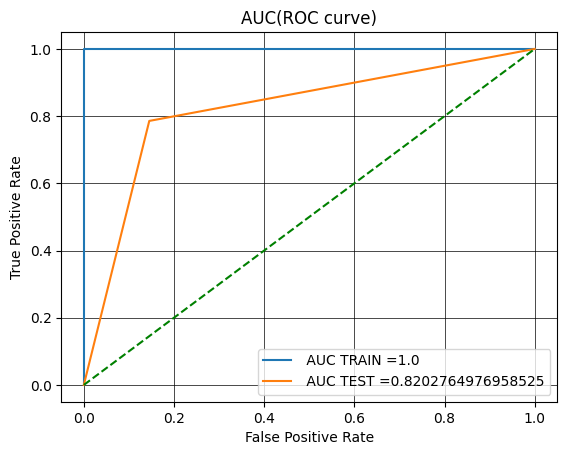

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Feature Selection + Hyperparameter

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Importing GridSearchCV from model_selection - CV - Cross Validation
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=2)

# Fitting the data
grid.fit(X_train, y_train)

grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf

In [ ]:
from sklearn.metrics import cohen_kappa_score

#calculate Cohen's Kappa
cohen_kappa_score(y_test, grid_predictions)

0.7356051703877791

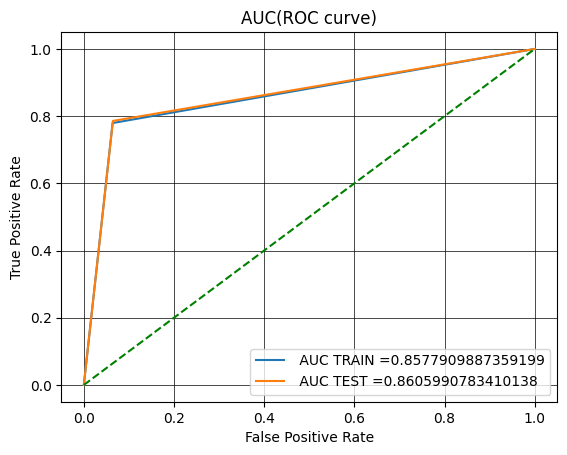

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()